# Decision Tree (의사 결정 나무)

- 데이터를 분류하거나 회귀하기 위해 조건 분할을 반복하여 트리를 형성하는 모델 
- Root Data -> 조건식을 이용하여 참/거짓 데이터를 반복적으로 분할 -> Leaf node로 내려가면서 최종 예측
- 사람이 해석하기 쉬운 모델. 부스팅 계열이나 랜덤포레스트 기본 학습기로 활용
- feature 기준으로 데이터를 분할
- 불순도 
    - 분류 : 지니 계수, 엔트로피, 로그 손실 
    - 회귀 : 분산 감소, MSE, MAE
- 매개변수 
    - criterion 
        - 분류 
            - 기본값 : gini 
            - 불순도의 계산 방법 
                - entropy : 성능 향상, 속도 느려짐 
                - log_loss : 확률적 분류 
        - 회귀
            - 기본값 : squared_error
            - 불순도의 오차를 기준으로 볼것인가 분산을 기준으로 볼것인가
                - squared_error : 평균 제곱 오차 
                - absolute_error : 평균 절대 오차 
                - friedman_mes : 분산 감소 기반 
    - spliter
        - 기본값 : best
        - 분할 시 feature(컬럼) 선택 방식
        - best 
            - 가장 좋은 feature 선택 
        - random
            - 무작위 feature 선택(앙상블에서 모델의 다양성)
    - max_depth
        - 기본값 : None
        - 트리의 최대 깊이 제한 
        - None인 경우에는 Leaf까지 계속 분할 -> 과적합 위험 
    - min_samples_split
        - 기본값 : 2
        - 노드를 분할하기위한 최소한의 샘플의 개수 지정
    - min_samples_leaf
        - 기본값 : 1
        - Leaf 노드가 되기 위한 최소 샘플 수 
    - max_features
        - 기본값 : None
        - 최적으로 분할 시 고려할 feature의 개수
        - None
            - 모든 feature 사용
        - sqrt
            - feature의 수에 루트를 입혀서 사용
        - log2
            - feature의 수에 log2을 입혀서 사용 
        - 숫자의 형태로 고정된 값을 사용
    - min_impurity_decrease
        - 기본값 : 0.0
        - 불순도 감소량이 해당 매개변수의 인자값 이상일때만 데이터 분할 수행
    - ccp_alpha
        - 기본값 : 0.0
        - 비용-복잡도 가지치기 매개변수 
        - 값이 커지면 트리의 단순화 
- 속성
    - tree_
        - 트리 구조에 대한 상세 객체 
    - classes_
        - 분류 문제에서 클래스 목록 
    - n_classes_
        - 클래스의 개수 
    - n_features_in_
        - 입력되는 데이터의 피쳐 개수 
    - feture_importances_
        - 각 feature들의 중요도 (합은 1고정)
- 메서드 
    - fit(x, y)     
        - 모델의 학습
    - predict(x)
        - 예측값 생성
    - predict_proba(x)
        - 분류 모델에서 사용
        - 각 클래스별 예측 확률
    - score(x, y)
        - 분류에서는 정확도
        - 회귀에서는 R2-score
    - export_graphviz
        - 트리 구조를 시각화 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

In [ ]:
iris = pd.read_csv("../data/iris.csv")
iris.head(1)

In [ ]:
target_list = iris['target'].unique()

In [ ]:
for i, target in enumerate(target_list):
    iris['target'] =iris['target'].replace(target, i)

In [8]:
iris['target'].unique()

array([0, 1, 2])

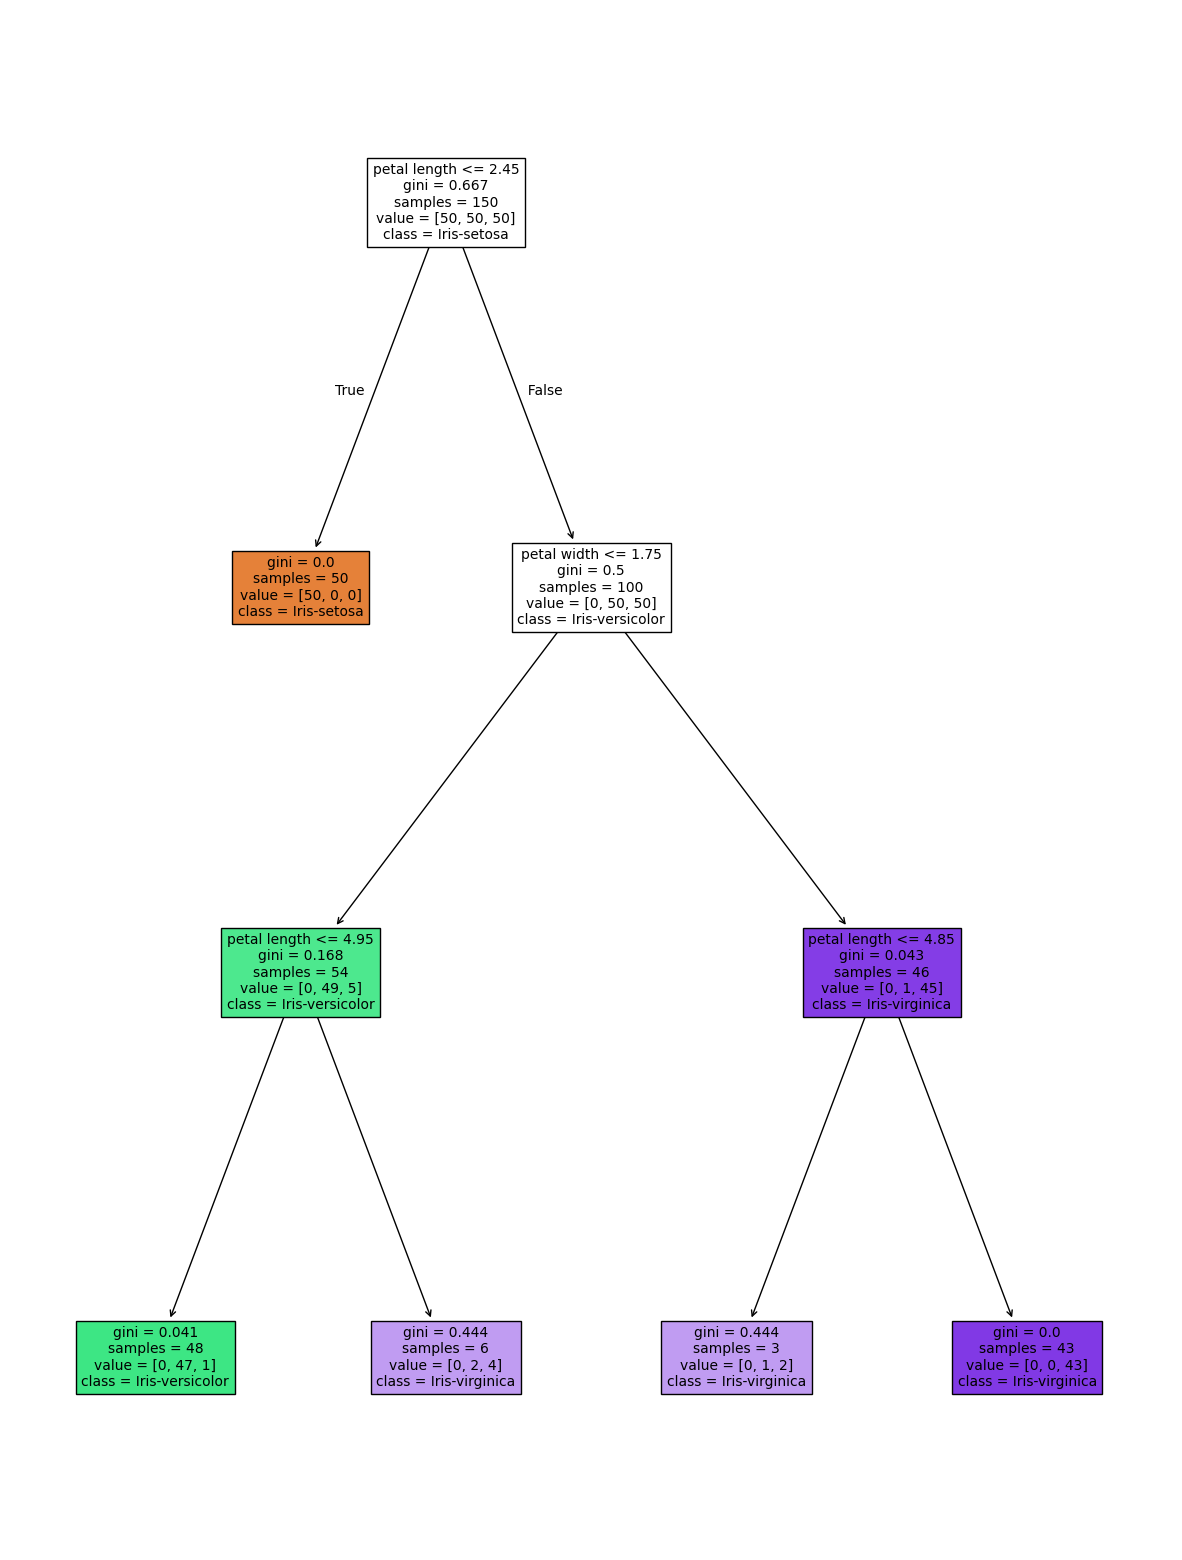

In [ ]:
# 독립 변수, 종속 변수 
x = iris.drop('target', axis=1).values
y = iris['target'].values

# 모델을 생성
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
# 모델 학습 
clf.fit(x, y)
feature_names = iris.drop('target', axis=1).columns
# 트리 구조를 시각화 
plt.figure(figsize=(15, 20))
plot_tree(
    clf, 
    feature_names=feature_names, # feature 이름을 지정
    class_names= target_list, # 분류의 class의 이름을 지정
    fontsize = 10,  # 글자의 크기 지정
    filled = True   # 노드의 색상을 표시 여부
)
plt.show()

# 부스팅 
- 모델을 순차적으로 학습 
- 이전 모델이 잘못 맞춘 데이터에 가중치 증가 -> 다음 모델에서 집중 학습 
- 단순 모델를 합쳐서 강한 모델로 생성
- 장점 
    - 편향 감소 -> 예측의 확률이 올라간다. 
    - 단순한 모델을 조합하여 높은 성능 가진 모델
- 단점
    - 순차적으로 학습 -> 병렬화 어려움 -> 학습 속도가 느려짐
    - 학습의 횟수가 너무 많은 경우 -> 과적합 위험 
    - 파라미터 튜닝 중요
- 대표 알고리즘 
    - AdaBoost
        - 오차가 큰 샘플에 더 높은 가중치 부여 
        - 각각의 모델들은 가중치가 조정된 데이터셋을 이용하여 학습 
        - 최종 모델에서는 가중치의 합산으로 결정 
    - Gradient Boosting(GBM)
        - 이전 모델의 잔차를 예측하는 새로운 모델을 추가 
        - 손실 함수를 직접 최적화 
        - 계산량이 많음 
    - XGBoost
        - GBM을 개선한 알고리즘 
        - 규제, 병렬 학습 지원 -> 병렬지원을 통해 시간이 감소, 규제를 통해 과적합 방지 
        - 대표적인 부스팅 알고리즘 
    - LightGBM
        - XGBoost이 비해 속도가 우수
        - Histogram 기반 학습을 통해서 대용량 데이터의 처리에 최적화 
    - CatBoost
        - 범주형 변수들을 자동 처리 
        - 비교적인 튜닝이 간단

## AdaBoost
- 초기에는 모든 샘플의 가중치를 동일하게 부여 
- 첫번째 모델에서는 약한 모델을 학습 -> 잘못 분류한 샘플에 대해서 가중치를 증가 
- 가중치가 증가된 데이터를 이용하여 다음 모델에서 학습하여 더 잘 맞추도록 집중 학습 
- 이렇게 만들어진 여러 모델의 가중치의 합(분류) / 평균(회귀)으로 최종 예측

- 분류 
    - 매개변수
        - estimator (base_estimator -> sklearn 구버전의 매개변수명)
            - 기본값 : DecisionTreeClassfier(max_depth=1)
            - 모델의 선택
                - DecisiontreeClassfier() : 매개변수의 값들을 바꿔서 사용 가능 -> 의사결정나무
                - LogisticRegression() : 선형 분류 모델 
                - SVC(probability = True) : 확률 예측을 True로 변경을 해야 사용이 가능
        - n_estimator (일반적으로 50 ~ 500)
            - 기본값 : 50
            - 모델의 개수 
                - 개수가 많아지면 시간이 증가, 과적합 위험 
        - learning_rate (일반적으로 0.1 ~ 1)
            - 기본값 : 1.0
            - 각 단계별 기여도(가중치)
            - n_estimator와 상호 보완적(rate을 작게하면 모델의 개수를 증가)
            - 약한 모델의 기여도를 조절하는 스케일링 값
            - 값이 작은 경우에는 각 단계에서 영향이 줄어듬 -> 더 많은 모델이 필요
            
            - 데이터의 크기/복잡도 클수록 모델의 개수를 늘리고 기여도를 줄여주는 것이 유리 
            - 작은 데이터셋 모델의 개수를 줄이고 기여도를 증가시키는 유리 
        - algorithm
            - 기본값 : SAMME.R
            - SAMME.R : 확률을 사용, 보통 시간이 빠르고 성능이 우수
            - SAMME : 클래스별 점수를 기반(확률이 필요 없음)
    - 속성
        - estimators_
            - 학습된 모델의 리스트
        - estimators_weights_
            - 각 단계별 모델의 가중치(분류에서 중요)
        - extimators_errors_
            - 각 단계별 오차율
        - features_infortanses_
            - feature 별 중요도 (가중치의 합)
    - 메서드 
        - fit(x, y)
            - 모델의 학습
        - predict(x)
            - 예측 값 생성
        - predict_proba(x)
            - 클래스 별 확률 예측(SAMME.R에서 주로 유효 사용)
        - decision_function(x)
            - 결정 함수의 값
        - staged_predict(X) / staged_predict_proba(X)
            -  각 단계별 누적 모델의 예측을 순차적으로 제공 (학습 곡선)
        